In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

plt.style.use("bmh")

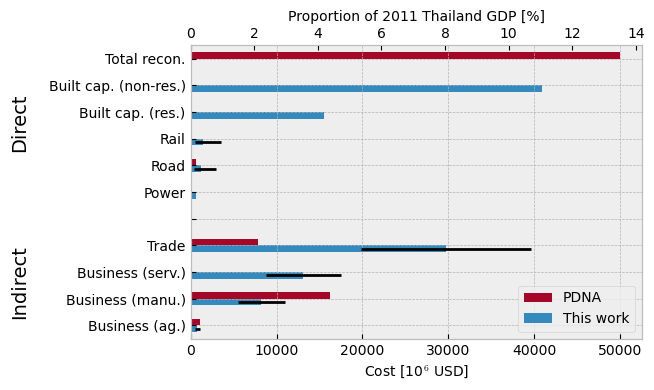

In [73]:
index = [                        "This work",    "PDNA", "This work [-err]", "This work [+err]", "PDNA [-err]", "PDNA [+err]"]
# 135 is centre of 90 - 180 day time window
# 45 is distance from 90 or 180 to 135
data = {
    "Business (ag.)": [            135 * 5.9,      1100,           45 * 5.9,           45 * 5.9,             0,             0],
    "Business (manu.)": [           135 * 61,     16200,            45 * 61,            45 * 61,             0,             0],
    "Business (serv.)": [           135 * 97,    np.nan,            45 * 97,            45 * 97,             0,             0],
    "Trade": [                     135 * 220,      7900,           45 * 220,           45 * 220,             0,             0],
    "": [                                  0,         0,                  0,                  0,             0,             0],
    "Power": [                           660,        80,                  0,                  0,             0,             0],
    "Road": [                           1200,       644,         1200 - 440,        3000 - 1200,             0,             0],
    "Rail": [                           1400,        98,         1400 - 490,        3600 - 1400,             0,             0],
    "Built cap. (res.)": [             15500,    np.nan,                  0,                  0,             0,             0],
    "Built cap. (non-res.)": [         40900,    np.nan,                  0,                  0,             0,             0],
    "Total recon.": [                 np.nan,     50000,                  0,                  0,             0,             0],
}
df = pd.DataFrame(data=data, index=index)
# required error shape is (2, 2, n)
# that is...     ((This work, PDNA), (min, max), (quantity0, quantity2, ..., quantityn))
# there is probably a better way to assemble the error array
# ... sorry
errors = np.hstack(
    [
        df.loc[["This work [-err]", "PDNA [-err]"], :].values[:, np.newaxis],
        df.loc[["This work [+err]", "PDNA [+err]"], :].values[:, np.newaxis]
    ]
)
f, ax = plt.subplots(figsize=(7,4))
df.loc[["This work", "PDNA"], :].T.plot.barh(ax=ax, xerr=errors)
# reverse order of legend entries to correspond with bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", loc="lower right")
ax.set_xlabel(r"Cost [10$^{6}$ USD]", size=10)
ax.set_ylabel("")
ax.text(-0.4, 0.65, "Direct", rotation=90, transform=ax.transAxes, size=14)
ax.text(-0.4, 0.08, "Indirect", rotation=90, transform=ax.transAxes, size=14)

thai_gdp = 370_000  # 2011 Thailand GDP USD figure, World Bank 
_, maxx = ax.get_xlim()
ax_gdp = ax.twiny()
ax_gdp.set_xlim(0, 100 * (maxx / thai_gdp))
ax_gdp.set_xlabel("Proportion of 2011 Thailand GDP [%]", size=10)
ax_gdp.grid(False)

plt.tight_layout()

# figure for summary section
f.savefig("plots/summary.png")

In [66]:

maxx

52500.0

In [61]:
# prepare a table for inclusion in summary section
# should be able to copy and paste output of cell to word, then format as appropriate

# transpose and reverse to match figure ordering
tab = df.T.iloc[::-1, ]
tab["This work [min]"] = tab["This work"] - tab["This work [-err]"]
tab["This work [max]"] = tab["This work"] + tab["This work [+err]"]
tab = tab.loc[[index for index in tab.index if not index == ""], ["This work [min]", "This work [max]", "PDNA"]]

pd.options.display.float_format = "{:,.0f}".format
tab[tab.isna()] = "-"
direct_or_indirect = tab.loc[[index for index in tab.index if not index == ""]].index.map(quantity_to_type)
multiindex = pd.MultiIndex.from_tuples(tuple(zip(direct_or_indirect, tab.index)), names=("Type", "Quantity"))
tab.index = multiindex
tab.loc[:, ["This work [min]", "This work [max]", "PDNA"]]

This work [min] This work [max]   PDNA
Type     Quantity                                                    
Direct   Total recon.                        -               - 50,000
         Built cap. (non-res.)          40,900          40,900      -
         Built cap. (res.)              15,500          15,500      -
         Rail                              490           3,600     98
         Road                              440           3,000    644
         Power                             660             660     80
Indirect Trade                          19,800          39,600  7,900
         Business (serv.)                8,730          17,460      -
         Business (manu.)                5,490          10,980 16,200
         Business (ag.)                    531           1,062  1,100